# Lecture 04
by Martin Hronec <br>
March 13-14


### Table of contents

* [Object-oriented programming](#OOP)

# OOP 
* the traditional (at least for us) programming paradigm is called **procedural** (Fortran, C, MATLAB, etc.)
    * we have data (variables) in different states
    * we call functions on these data
* in OOP *data* and *functions* (methods) are “bundled together” into **objects**
* OOP supported in many languages:
    * R is more procedural with some (rather atypical) OOP blend
    * JAVA and Ruby are pure OOP
    * Fortran and MATLAB are mainly procedural (recently OOP tacked on)
    * C is procedural, C++ is C with OOP added on to
* Python is a blends object oriented and procedural styles, rather than OOP only
    * most of the times (especially for small programs) you can use procedural programming
* however, at a foundational level, Python is object oriented (the more complex the programm the more usefull the OOP paradigm)
* everything in memory is treated as an object
    * functions (once they have been read into memory) 
    * modules 
    * files opened for reading or writing
    * integers, etc.
 
* OOP used for modeling complex systems by describing a collection of interacting objects via their data and behavior
* useful when working on problems where there is some common structure in it
    * a statistical model consists of coefficients, data, derived metrics, etc.
    * a game consists of a list of players, lists of actions available to each player, player payoffs as functions of all players’ actions, and a timing protocol
    * a market consists of buyers, sellers and intermediaries
* abstractions that collect together “objects” of the same “type”
    * recognizing common structure allows us to employ common tools

* OOP paradigm should be implemented using these steps
    * OOA (analysis), OOD (design) and OOP
        * ideally separated, in reality overlapping and repeating 
        
* to represent OOP structure, use [Unified Modeling Language (UML)](https://www.uml-diagrams.org/index-examples.html)
    * easy-to-draw and easy-to-read
    * most of the things are optional (only specify as much information in a diagram as makes sense for the current situation
    * con: UML diagrams are going to be redundant before they're implemented 
        * the most important person you will ever have to communicate with is yourself (why did I do design decision?)


## Objects
* an object is a collection of data and instructions held in computer memory that consists of:
    * a type
    * an unique identity
    * data (content)
    * methods
    
### Type
* different types of objects, to accommodate different categories of data

In [328]:
s = 'A string'
type(s)

str

In [329]:
x = 42 
type(x)

int

In [330]:
import numpy as np
type(np)

module

* the type of an object matters for many expressions, e.g.
    * the addition operator between two strings = concatenation
    * vs. the addition between two integers or floats

In [332]:
'100' + 'cc'

'300cc'

In [336]:
100 + 347

447

In [337]:
# mixing types, not clear what to do
'100' + 347

TypeError: can only concatenate str (not "int") to str

* here we are mixing types, and it’s unclear to Python whether the user wants to
  * convert '100' to an integer and then add it to 400, or
  * convert 347 to string and then concatenate it with '300'
* to avoid the error, you need to clarify by changing the relevant type

In [339]:
int('100') + 347  # To add as numbers, change the string to an integer

447

### Identity
* each object has a unique identifier, which helps Python (and us) keep track of the object
* the identity of an object can be obtained via the `id()` function

In [340]:
y = 2.5
z = 2.5
print(id(y))
id(z)

143360072


94638608

In [341]:
id(np)

31907096

* y and z happen to have the same value, but they are not the same object
    * the identity of an object is just the address of the object in memory

### Data and Attributes
* if we set `x = 42` then we create an object of type int that contains the data 42
    * however, it contains much more:

In [342]:
x = 42
x

42

In [345]:
dir(x);

In [346]:
x.imag

0

* when Python creates this integer object, it stores with it various auxiliary information, such as the imaginary part, and the type
    * any name following a dot is called an attribute of the object to the left of the dot
    * objects have attributes that contain auxillary information
        * some attributes act like functions, these are called **methods**

### Methods
* functions that are bundled with objects
* methods are attributes of objects that are callable (i.e., can be called as functions)
* class methods differ from ordinary functions by the necessity to have an extra first name `self` (at the beginning of the parameter list)

In [347]:
?callable

Signature: callable(obj, /)
Docstring:
Return whether the object is callable (i.e., some kind of function).

Note that classes are callable, as are instances of classes with a
__call__() method.
Type:      builtin_function_or_method


* e.g. Python list not only stroes data, but also knows how to append value to itself or sort itself
    * `sort` and `append` are functions that are “part of” the list object — and hence called methods

In [348]:
x = ['foo', 'bar']
callable(x.sort)

True

In [349]:
callable(x.append)

True

In [350]:
callable(x.__doc__)

False

In [355]:
# Methods typically act on the data contained in the object they belong to, or combine that data with other data
x = ['a', 'b']
x.append('c')
s = 'A string'
s.upper()

'A STRING'

In [356]:
s.lower()

'a string'

* it doesn’t look like there are any methods used here, but in fact the square bracket assignment notation is just a convenient interface to a method call
    * Python calls the __setitem__ method
* if you wanted to you could modify the __setitem__ method, so that square bracket assignment does something totally different
    * be nice though

In [358]:
x = ['a', 'b']
x.__setitem__(0, 'aa')  # Equivalent to x[0] = 'aa'
x

['aa', 'b']

In [360]:
def f(x): 
    return x**2
f

<function __main__.f(x)>

In [361]:
print([type(f),
      id(f),
      f.__name__,
      f.__call__(3)])

[<class 'function'>, 143894864, 'f', 9]


In [363]:
f.__dict__

{}

## Classes

* **class**: a blueprint for building objects
    * own types of objects $\approx$ usage of class definitions
* class describes:
    * what kind of data the class stores
    * what methods it has for acting on these data 
* takes a little while to get used to the syntax
* the simplest class

In [14]:
class Simplicity:
    pass  # No code means no bad code

s = Simplicity()
print(s)

* an **object** or **instance** is a realization of the class, created from the blueprint
    * each instance has its own unique data
    * methods set out in the class definition act on this (and other) data

* Attributes are accessed via “dotted attribute notation”
    * `object_name.data`
    * `object_name.method_name()

In [364]:
# object
x = [1, 5, 4]
# method (attribute)
x.sort()
# another attribute 
x.__class__;

* `x` is an object or instance, created from the definition for Python lists, but with its own particular data
* `x.sort()` and `x.__class__` are two attributes of `x`
* `dir(x)` can be used to view all the attributes of `x`

In [366]:
dir(x);

In [367]:
class Student: 
    def __init__(self):
        self.status = None # placeholder
    
    def study(self):
        self.status = 'Wise.'
    
    def procrastinate(self):
        self.status = 'Dumb.'
    
    def show_status(self):
        print(self.status)

* convention: capitalize class names (to differentiate them from functions, which are lowercase by convention)

* `__init__` is a *constructor method* 
    * provides a recipe for how to build an instance of a class
    * whenewer we create an instance of the class, this method will be called automatically
    * calling `__init__` sets up a "namespace" to hold the instance data
* methods `study` and `procrastinate` act on the instance data `status`

In [368]:
s = Student()

In [369]:
s.show_status()

None


In [370]:
s.procrastinate()

In [371]:
s.show_status()

Dumb.


In [372]:
s.study()

In [373]:
s.show_status()

Wise.


* `s` is just a one instance
* we can create multiple students ofc

In [374]:
Vitek = Student()
Vincent = Student()

Vitek.study()
Vincent.procrastinate()

Vitek.show_status()
Vincent.show_status()

Wise.
Dumb.


* an instance of a class can take on any name a we choose
* link between the instance name and the class: `self`
    * `self` as a variable whose sole job is to learn the name of a particular instance
* any instance data should be prepended with `self`
* any method defined within the class should have self as its first argument
* any method referenced within the class should be called as self.method_name

* each instance stores its data in a separate namespace dictionary

In [375]:
Vitek.__dict__

{'status': 'Wise.'}

* following are equivalent

In [376]:
s.procrastinate()
s.show_status()

Dumb.


In [377]:
Student.study(s)
Student.show_status(s)

Wise.


### Example of moving from procedural to OOP
* usually we start with simple built-in data structures
    * storing data in a few variables
* with expanding program size we see that we are **passing the same set of related variables to different functions**
    * time to think about grouping variables and functions into a class
    
**Example**
* let's think about modelling polygons in 2D space
* each polygon represented as a list of points
* each point represented as a tuple (x,y), where x and y are coordinates

In [1]:
square = [(1,1), (1,2), (2,2), (2,1)]

* to calculate the perimeter, we need to calculate the [distance](https://en.wikipedia.org/wiki/Euclidean_distance) between two points

In [2]:
import math

def distance(p1, p2):
    dist = math.sqrt(
        (p1[0]-p2[0])**2 + (p1[1]-p2[1])**2
        )
    return dist

def perimeter(polygon):
    perimeter = 0
    points = polygon + [polygon[0]]   
    for i in range(len(polygon)):
        perimeter += distance(points[i], points[i+1])
    return perimeter

In [3]:
distance((1,1), (1,2))

1.0

In [4]:
perimeter(square)

4.0

* thinking in an object-oriented way, we see that
    * polygon class could encapsulate the list of points (data) and the perimeter function (behaviour)
    * point class could encapsulate the coordinates (x,y) and the distance method

In [6]:
class Point:
    
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def distance(self, p2):
        return math.sqrt((self.x-p2.x)**2 + (self.y-p2.y)**2)

class Polygon:
    
    def __init__(self):
        self.vertices = [] 
        
    def add_point(self, point):
        self.vertices.append(point)

    def perimeter(self):
        perimeter = 0
        # add "first" point to the list of points defining polygon
        points = self.vertices + [self.vertices[0]]    
        for i in range(len(self.vertices)):
            perimeter += points[i].distance(points[i+1])
        return perimeter

In [9]:
# example of usage
square = Polygon()
square.add_point(Point(1,1))
square.add_point(Point(1,2))
square.add_point(Point(2,2))
square.add_point(Point(2,1))
square.perimeter()

4.0

In [10]:
# compare with the previous case
sq = [(1,1), (1,2), (2,2), (2,1)]
perimeter(sq)

4.0

* 2 lines of code vs. 6 ... what is this OOP nonsense?
    * code length is really not a good indicator of code complexity
    
* OOP is easier to read compared to the procedural code above
    * how do we know what the list of tuples is supposed to represent
    * what should we pass into the perimeter function? list of tuples?
    * possible, but plenty of documentation necessary (might be much longer than the code itself)
    
* OOP pretty self-documenting
    * list of methods and parameters to see what the object does
* if you are still not convinced, since our OOP case is too long, let's add some functionality to this class

In [11]:
class Point:
    
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def distance(self, p2):
        return math.sqrt((self.x-p2.x)**2 + (self.y-p2.y)**2)

class Polygon:
    
    def __init__(self, points = []):
        self.vertices = []
        for point in points:
            if isinstance(point, tuple):
                point = Point(x = point[0], y = point[1])
            self.add_point(point)
        
    def add_point(self, point):
        self.vertices.append((point))

    def perimeter(self):
        perimeter = 0
        
        # add "first" point to the list of points defining polygon
        points = self.vertices + [self.vertices[0]]    
        for i in range(len(self.vertices)):
            perimeter += points[i].distance(points[i+1])
        return perimeter

In [12]:
square = Polygon(points = [(1,1), (1,2), (2,2), (2,1)])
square.perimeter()

4.0

Let's move to something little bit more interesting ... 

## OOP and OLS model

* we'll build a class called LinearRegression
    

In [387]:
class LinearRegression:    
    def __init__(self, fit_intercept = True):
        # define instance data coef, intercept and _fit_intercept
        self.coef_ = None # placeholder 
        self.intercept_ = None # placeholder  
        self._fit_intercept = fit_intercept

In [388]:
?LinearRegression

Init signature: LinearRegression(fit_intercept=True)
Docstring:      <no docstring>
Type:           type
Subclasses:     


In [389]:
dir(LinearRegression)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__']

In [390]:
# lr and alr are (or will be) unique models
lr = LinearRegression
alr = LinearRegression

In [13]:
import numpy as np

class LinearRegression:
    
    def __init__(self, fit_intercept = True):
        self.coef_ = None # placeholder 
        self.intercept_ = None # placeholder  
        self._fit_intercept = fit_intercept
        self.predictions = None
    
    def fit(self, X, y):
        """
        Obtain coefficients using closed form solution.

        Arguments:
        X: 1D or 2D numpy array (cols are independent variables)
        y: 1D numpy array (dependent variable)
        """
        
        # check if X is 1D or 2D array
        if len(X.shape) == 1:
            X = X.reshape(-1,1)
            
        # add bias if fit_intercept is True
        if self._fit_intercept:
            X = np.c_[np.ones(X.shape[0]), X]
        
        # closed form solution
        xTx = np.dot(X.T, X)
        inverse_xTx = np.linalg.inv(xTx)
        xTy = np.dot(X.T, y)
        coef = np.dot(inverse_xTx, xTy)
        
        # set attributes
        if self._fit_intercept:
            self.intercept_ = coef[0]
            self.coef_ = coef[1:]
        else:
            self.intercept_ = 0
            self.coef_ = coef
    
    def predict(self, X):
            
        """
        Model prediction given the data matrix.

        Arguments:
        X: 1D or 2D numpy array 
        """

        # check if X is 1D or 2D array
        if len(X.shape) == 1:
            X = X.reshape(-1,1) 
        self.predictions =  self.intercept_ + np.dot(X, self.coef_)
        return self.predictions

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

n = 100
X = np.linspace(1,10,n)
y = 0.35 * X + np.random.normal(0,1,n)

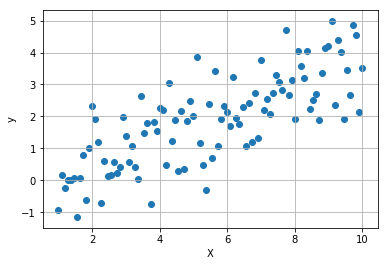

In [15]:
plt.scatter(X,y)
plt.grid()
plt.xlabel('X')
plt.ylabel('y');

In [16]:
# see how it works
lr = LinearRegression()
lr.fit(X, y)

In [17]:
lr.__dict__

{'coef_': array([0.41836425]),
 'intercept_': -0.4100342643103261,
 '_fit_intercept': True,
 'predictions': None}

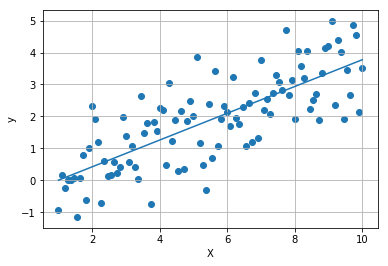

In [18]:
plt.scatter(X,y)
plt.plot(X,lr.predict(X))
plt.grid()
plt.xlabel('X')
plt.ylabel('y');

In [19]:
lr.__dict__

{'coef_': array([0.41836425]),
 'intercept_': -0.4100342643103261,
 '_fit_intercept': True,
 'predictions': array([0.00832999, 0.0463631 , 0.08439622, 0.12242933, 0.16046244,
        0.19849556, 0.23652867, 0.27456178, 0.3125949 , 0.35062801,
        0.38866113, 0.42669424, 0.46472735, 0.50276047, 0.54079358,
        0.57882669, 0.61685981, 0.65489292, 0.69292604, 0.73095915,
        0.76899226, 0.80702538, 0.84505849, 0.88309161, 0.92112472,
        0.95915783, 0.99719095, 1.03522406, 1.07325717, 1.11129029,
        1.1493234 , 1.18735652, 1.22538963, 1.26342274, 1.30145586,
        1.33948897, 1.37752208, 1.4155552 , 1.45358831, 1.49162143,
        1.52965454, 1.56768765, 1.60572077, 1.64375388, 1.681787  ,
        1.71982011, 1.75785322, 1.79588634, 1.83391945, 1.87195256,
        1.90998568, 1.94801879, 1.98605191, 2.02408502, 2.06211813,
        2.10015125, 2.13818436, 2.17621748, 2.21425059, 2.2522837 ,
        2.29031682, 2.32834993, 2.36638304, 2.40441616, 2.44244927,
        2

### Inheritance
* defining a new class (*derived* or *child* class) from another class (*base* or *parent* class)
    * reuse what you can instead of repeating yourself
* derived class inherits features of the base class
    * we can ofc add to it
* let's define another class from which we will inherit

In [21]:
class Metrics:
    
    def sse(self):
        '''sum of squared errors'''
        squared_errors = (self.target - self.predict(self.data)) ** 2
        self.sq_error_ = np.sum(squared_errors)
        return self.sq_error_
        
    def sst(self):
        '''total sum of squared errors'''
        avg_y = np.mean(self.target)
        squared_errors = (self.target - avg_y) ** 2
        self.sst_ = np.sum(squared_errors)
        return self.sst_
    
    def r_squared(self):
        '''r^2: coefficient of determination'''
        self.r_sq_ = 1 - self.sse()/self.sst()
        return self.r_sq_
    
    def adj_r_squared(self):
        '''adjusted r^2'''
        self.adj_r_sq_ = 1 - (self.sse()/self._dfe) / (self.sst()/self._dft)
        return self.adj_r_sq_
    
    def mse(self):
        '''mean squared error'''
        self.mse_ = np.mean( (self.predict(self.data) - self.target) ** 2 )
        return self.mse_

* let's actually inherit something

In [22]:
class LinearRegressionWithInheritance(Metrics):
    
    def __init__(self, fit_intercept=True):
        self.coef_ = None
        self.intercept_ = None
        self._fit_intercept = fit_intercept
        self.predictions = None
        
    def fit(self, X, y):
        """
        Fit model coefficients.

        Arguments:
        X: 1D or 2D numpy array 
        y: 1D numpy array
        """
        
        self.data = X
        self.target = y 
        
        # check if X is 1D or 2D array
        if len(X.shape) == 1:
            X = X.reshape(-1,1)
        
        # add bias if fit_intercept is True
        if self._fit_intercept:
            X = np.c_[np.ones(X.shape[0]), X]
        
        # closed form solution
        xTx = np.dot(X.T, X)
        inverse_xTx = np.linalg.inv(xTx)
        xTy = np.dot(X.T, y)
        coef = np.dot(inverse_xTx, xTy)
        
        # set attributes
        if self._fit_intercept:
            self.intercept_ = coef[0]
            self.coef_ = coef[1:]
        else:
            self.intercept_ = 0
            self.coef_ = coef
            
    def predict(self, X):
            
        """
        Output model prediction.

        Arguments:
        X: 1D or 2D numpy array 
        """

        # check if X is 1D or 2D array
        if len(X.shape) == 1:
            X = X.reshape(-1,1) 
        self.predictions =  self.intercept_ + np.dot(X, self.coef_)
        return self.predictions

In [23]:
# see how it works
lri = LinearRegressionWithInheritance()
lri.fit(X, y)

In [24]:
lri.__dict__

{'coef_': array([0.41836425]),
 'intercept_': -0.4100342643103261,
 '_fit_intercept': True,
 'predictions': None,
 'data': array([ 1.        ,  1.09090909,  1.18181818,  1.27272727,  1.36363636,
         1.45454545,  1.54545455,  1.63636364,  1.72727273,  1.81818182,
         1.90909091,  2.        ,  2.09090909,  2.18181818,  2.27272727,
         2.36363636,  2.45454545,  2.54545455,  2.63636364,  2.72727273,
         2.81818182,  2.90909091,  3.        ,  3.09090909,  3.18181818,
         3.27272727,  3.36363636,  3.45454545,  3.54545455,  3.63636364,
         3.72727273,  3.81818182,  3.90909091,  4.        ,  4.09090909,
         4.18181818,  4.27272727,  4.36363636,  4.45454545,  4.54545455,
         4.63636364,  4.72727273,  4.81818182,  4.90909091,  5.        ,
         5.09090909,  5.18181818,  5.27272727,  5.36363636,  5.45454545,
         5.54545455,  5.63636364,  5.72727273,  5.81818182,  5.90909091,
         6.        ,  6.09090909,  6.18181818,  6.27272727,  6.36363636,
  

In [25]:
lri.r_squared()

0.5942104716549982

* class can be derived from more than one base class in Python, so called multiple inheritance
    * features of all the base classes are inherited into the derived class

In [26]:
class Base1:
    pass

class Base2:
    pass

class MultiDerived(Base1, Base2):
    pass

* class can also inherit from an already derived class, so called *multilevel inheritance*

In [27]:
class Base:
    pass

class Derived1(Base):
    pass

class Derived2(Derived1):
    pass

* every class in Python is derived from the class `object`

In [28]:
?object

Init signature: object()
Docstring:      The most base type
Type:           type
Subclasses:     type, weakref, weakcallableproxy, weakproxy, int, bytearray, bytes, list, NoneType, NotImplementedType, ...


* in the multiple inheritance scenario, any specified attribute is searched first in the current class
    * if not found, the search continues into parent classes based on the depth, i.e. [MultiDerived, Base1, Base2, object]
* if we define the same method in base as well as derived class (but differently), i.e. **overriding methods**
    * instances of the new class will have the new behavior and the instances of the existing class will have the old behavior
           

### Composition
* imagine a class that needs to accumulate an arbitrary number of objects
    * a list can do that, so we should subclass (inherit) list, right?
        * list also support a number of other operations (iterate over the objects, sort, reverse, etc.)
* do we need all those features?
    * if no, our class should only contain a list (rather than fully inheriting from it)
* **composition** is used when we want to use some aspect of another class without promising all of the features of that other class

### Example of OOP in the real world
* [statsmodels](https://www.statsmodels.org/dev/index.html) is a Python module for the estimation of statistical models, conducting statistical tests, etc.
* let's look at its codebase

## Docstrings in Python
* **Python Docstring** is the documentation string (written as a first statement), part of the:
    * class, module, function, method, etc.
* a descriptive text written by a programmer mainly for themselves to know what the line of code or expression does
* docstrings are accesible as the `doc` attribute in the Python objects (as well as the built-in `help()`
* "rules" are only conventions really, based on the [PEP standard](https://www.python.org/dev/peps/pep-0008/), specifically [PEP 257](https://www.python.org/dev/peps/pep-0257/) dealing with *docstring* conventions
    * PEP means Python Enhancement Proposals 
* *one-line* vs *multi-line* Docstring


### One-liner

In [1]:
def cube(a):
    '''Returns the third power of number a.'''
    return a**3

In [2]:
cube.__doc__

'Returns the third power of number a.'

In [3]:
help(cube)

Help on function cube in module __main__:

cube(a)
    Returns the third power of number a.



* Some rules
    * The line begins with a capital letter and end with a period.
    * The closing quotes are on the same line as the opening quotes.
    * There's no blank line either before or after the Docstring.

### Multi-liner

In [408]:
def some_function(arg):
    """Summary or Description of the Function

    Parameters:
    arg (int): Description of arg

    Returns:
    int:Returning value

   """

    return argument1

In [4]:
print(some_function.__doc__)

## Common Docstring Formats
* many Docstrings format available
    * good idea to use those easily recognized by the other programmers as well as Docstring parsers
* use formatting type supported by [Sphinx](http://www.sphinx-doc.org/en/master/), Python documentation generator
* the most common formats:

| Type                    | Description                                                              |
|-------------------------|--------------------------------------------------------------------------|
| Numpy/Scipy Docstring   | Combination of reStructured and GoogleDocstrings and supported by Sphinx |
| Pydoc                   | Standard documentation module for Python and supported by Sphinx         |
| Google Docstring        | Easy and intuitive to use (used for the shorter docs)                    |